In [1]:
from Wavefronts import *
from Storage import *

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Create a single ON plulse 

In [2]:
Storage_Voltage_Active.append(Wavefront_Source(Voltage_Souce_Magnitude,0,Voltage_Source_Period_On,0))
Storage_Voltage_Active[0].about()


Some Information about a wavefront
Type :                             <class 'Wavefronts.Wavefront_Source'>
Poisiton Start :                   0
Poisiton End :                     0
Time Start :                       0
Time End :                         0.000012
Voltage Magnitude :                63
Current Magnitude :                0
Excitation Type :                  HIGH
Excitation Number :                0
Order :                            0
Inductive Reflections :            0
Capacitive Reflections :           0
Current Chain Reflections :        0
Transmission Ind -> Cap :          0
Transmission Cap -> Ind :          0


Populate inital Active wavefronts from Source

In [3]:
temp_wavefront = Storage_Voltage_Active.popleft()
temp_wavefront.Generate(Storage_Inductor_Active,Storage_Capacitor_Active)

Storage_Voltage_Completed.append(temp_wavefront)

Generate All wavefronts in Capacitor

In [4]:
Process_Wavefronts()

Plot Reflection Diagram

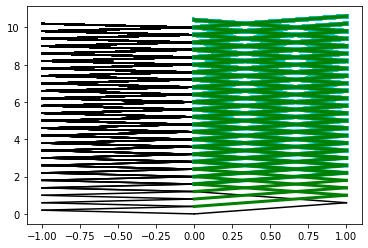

In [5]:
for wave in Storage_Capacitor_Completed:
    
    x1 = -wave.position_start
    x2 = -wave.position_end

    y1 = wave.time_start
    y2 = wave.time_end

    if(wave.order <=3):
        plt.plot([x1,x2],[y1,y2],'k-')


for wave in Storage_Inductor_Completed:
    
    x1 = wave.position_start
    x2 = wave.position_end

    y1 = wave.time_start
    y2 = wave.time_end

    if(wave.order == 0):
            plt.plot([x1,x2],[y1,y2],'k-',label = str(wave.magnitude_voltage))
    elif(wave.transmisions_capacitor_to_inductor > wave.transmisions_inductor_to_capacitor):
        if(wave.order == 1):
            plt.plot([x1,x2],[y1,y2],'g-',label = str(wave.magnitude_voltage),linewidth = 3)
        elif(wave.order == 2):
            plt.plot([x1,x2],[y1,y2],'b-',label = str(wave.magnitude_voltage),linewidth = 4)
    else:
        if(wave.order == 0):
            plt.plot([x1,x2],[y1,y2],'m-',label = str(wave.magnitude_voltage))
        elif(wave.order == 1):
            plt.plot([x1,x2],[y1,y2],'y-',label = str(wave.magnitude_voltage),linewidth = 3)
        elif(wave.order == 2):
            plt.plot([x1,x2],[y1,y2],'c-',label = str(wave.magnitude_voltage),linewidth = 4)


plt.show()

Exctract and Merge Voltages and Currents

In [6]:
Voltage_Array_Capacitor = []
Current_Array_Capacitor = []
Time_Array_Capacitor = []

for wave in Storage_Capacitor_Completed:
    
    time = 0

    if wave.position_start == 0:
        time = wave.time_start
    else:
        time = wave.time_end

    try:
        index = Time_Array_Capacitor.index(time)
    except:
        index = False

    if(index == False):
        Time_Array_Capacitor.append(time)
        Voltage_Array_Capacitor.append(wave.magnitude_voltage)
        Current_Array_Capacitor.append(wave.magnitude_current)
    else:
        Voltage_Array_Capacitor[index] = Voltage_Array_Capacitor[index] + wave.magnitude_voltage
        Current_Array_Capacitor[index] = Current_Array_Capacitor[index] + wave.magnitude_current

Voltage_Array_Inductor = []
Current_Array_Inductor = []
Time_Array_Inductor = []

for wave in Storage_Inductor_Completed:
    
    time = 0

    if wave.position_start == 0:
        time = wave.time_start
    else:
        time = wave.time_end

    try:
        index = Time_Array_Inductor.index(time)
    except:
        index = False

    if(index == False):
        Time_Array_Inductor.append(time)
        Voltage_Array_Inductor.append(wave.magnitude_voltage)
        Current_Array_Inductor.append(wave.magnitude_current)
    else:
        Voltage_Array_Inductor[index] = Voltage_Array_Inductor[index] + wave.magnitude_voltage
        Current_Array_Inductor[index] = Current_Array_Inductor[index] + wave.magnitude_current

In [7]:
Time_Voltage_Array_Capacitor = sorted(zip(Time_Array_Capacitor,Voltage_Array_Capacitor))
Time_Voltage_Array_Inductor = sorted(zip(Time_Array_Inductor,Voltage_Array_Inductor))

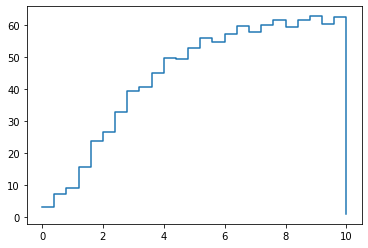

In [8]:
x,y = zip(*Time_Voltage_Array_Capacitor)

x= list(x)
y= list(y)

for i in range(1,len(y)-1):
    y[i] = y[i-1]+y[i] 

plt.step(x,y,where='post')


In [9]:
dict = {'time':x, 'Voltage Capacitor':y}
data_frame = pd.DataFrame(dict)
data_frame.to_csv('Capacitor_Voltage.csv',index=False)

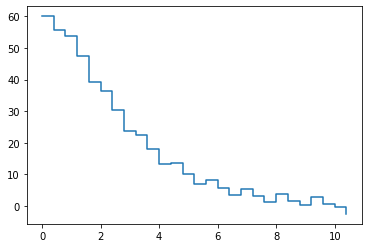

In [10]:
x,y = zip(*Time_Voltage_Array_Inductor)

x= list(x)
y= list(y)

for i in range(1,len(y)-1):
    y[i] = y[i-1]+y[i] 

plt.step(x,y,where='post')


In [11]:
dict = {'time':x, 'Voltage Inductor':y}
data_frame = pd.DataFrame(dict)
data_frame.to_csv('Inductor_Voltage.csv',index=False)

In [12]:
LTSPICE_data_raw = pd.read_fwf('By_Hand_63.txt',header = None, names = ["time","inductor voltage"],index_col= False)
LTSPICE_data_list = LTSPICE_data_raw.values.tolist()

In [13]:
LTSPICE_data_clean =[]
Have_Appended = False

for i in range(0,len(LTSPICE_data_list)-2):
    if(LTSPICE_data_list[i][1] == LTSPICE_data_list[i+1][1]):
        if(Have_Appended == False):
            LTSPICE_data_clean.append(LTSPICE_data_list[i])
            Have_Appended = True
    else:
        Have_Appended = False


In [14]:

x,y = zip(*LTSPICE_data_clean)
dict = {'time':x, 'Voltage Inductor':y}
data_frame = pd.DataFrame(dict)
data_frame.to_csv('Inductor_Voltage_LT.csv',index=False)
